In [13]:
#https://blog.csdn.net/qq_33431368/article/details/119769361
#https://blog.csdn.net/qq153471503/article/details/107319641/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing


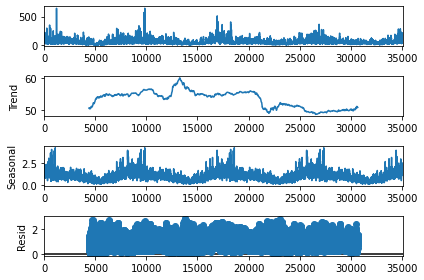

In [14]:
pf=pd.read_csv('library/csv/pm/shanghai_final1.csv')
decompose_result = seasonal_decompose(pf, model="multiplicative", period=8760)
decompose_result.plot()
plt.show()

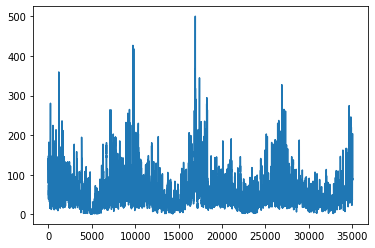

In [15]:
#第一次指数平滑
pf["1exp"] = SimpleExpSmoothing(pf["Value"]).fit(smoothing_level=0.5).fittedvalues
pf['1exp'].plot()
plt.show()

In [16]:
pf["2exp_add"] = ExponentialSmoothing(pf["Value"], trend="add", seasonal=None).fit().fittedvalues
pf["2exp_mul"] = ExponentialSmoothing(pf["Value"], trend="mul", seasonal=None).fit().fittedvalues


C:\Users\weixi\.virtualenvs\Innovative-practice-Om2RB-sU\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [17]:
pf["3exp_add"] = ExponentialSmoothing(pf["Value"], trend="add", seasonal="add", seasonal_periods=288).fit().fittedvalues
pf["3exp_mul"] = ExponentialSmoothing(pf["Value"], trend="mul", seasonal="mul", seasonal_periods=288).fit().fittedvalues

C:\Users\weixi\.virtualenvs\Innovative-practice-Om2RB-sU\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\weixi\.virtualenvs\Innovative-practice-Om2RB-sU\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


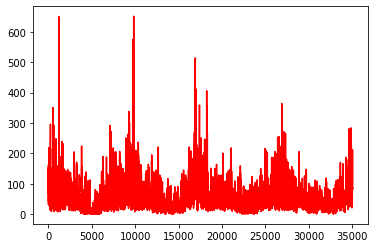

In [18]:
pf.to_csv("library/csv/pm/shanghai_result.csv", encoding="utf_8_sig")
plt.figure()
plt.plot( range(35063),pf["Value"], color='r', label='Value')
plt.show()